# Iris Dataset With K-Nearest Neighbors

In [1]:
import pandas
import seaborn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot

In [2]:
iris_dataset = pandas.read_csv("Machine Learning Data Set/iris.csv")
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [3]:
iris_dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
sepal_features = iris_dataset.loc[0:, ['sepal_length', 'sepal_width']]
petal_features = iris_dataset.loc[0:, ['petal_length', 'petal_width']]

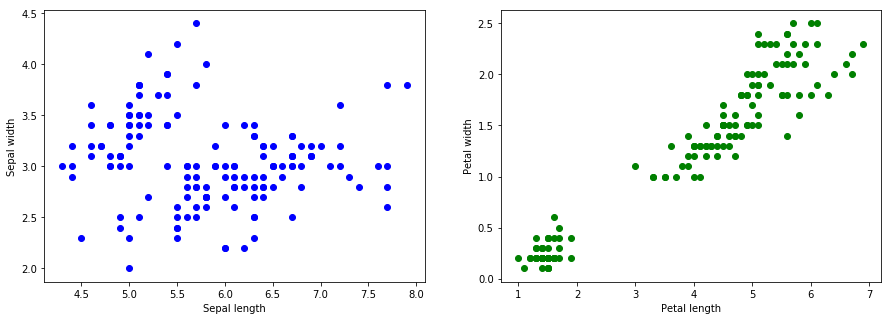

In [5]:
pyplot.figure(figsize=(15, 5))

pyplot.subplot(1,2,1)
pyplot.scatter(sepal_features.loc[0:, ['sepal_length']], 
               sepal_features.loc[0:, ['sepal_width']], c='b')
pyplot.xlabel('Sepal length')
pyplot.ylabel('Sepal width')

pyplot.subplot(1,2,2)
pyplot.scatter(petal_features.iloc[0:, 0], petal_features.iloc[0:, 1], c='g')
pyplot.xlabel('Petal length')
pyplot.ylabel('Petal width')

pyplot.show()

In [6]:
labels = iris_dataset['species']
iris_dataset.drop(['species'], axis=1, inplace=True)

In [7]:
train_values, test_values, train_labels, test_labels = \
train_test_split(iris_dataset, labels, stratify=labels, random_state=42)

In [8]:
knn_clasifier = KNeighborsClassifier()
knn_clasifier.fit(train_values, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
print("Accuracy with 5 neighbors on training set: {:.3f}"\
      .format(knn_clasifier.score(train_values, train_labels)))
print("Accuracy with 5 neighbors on test set: {:.3f}"\
      .format(knn_clasifier.score(test_values, test_labels)))

Accuracy with 5 neighbors on training set: 0.973
Accuracy with 5 neighbors on test set: 0.974


In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
param_grid = dict(n_neighbors = list(range(2, 21)))
cross_valid = GridSearchCV(knn_clasifier, param_grid, cv=5, scoring='accuracy')

In [12]:
cross_valid.fit(train_values, train_labels);

In [13]:
print('Best parameter for nearest neighbors classifier: {parameter}.\n\
Highest score on cross validation: {score:.3f}'.format(parameter=cross_valid.best_params_['n_neighbors'], 
                                                score=cross_valid.best_score_))

Best parameter for nearest neighbors classifier: 11.
Highest score on cross validation: 0.973


In [14]:
cross_valid_results = pandas.DataFrame(cross_valid.cv_results_)
cross_valid_represent_train = cross_valid_results.loc[0:, ['param_n_neighbors', 'mean_train_score']]
cross_valid_represent_train

,param_n_neighbors,mean_train_score
0,2,0.984316
1,3,0.961939
2,4,0.968706
3,5,0.973102
4,6,0.973102
5,7,0.970880
6,8,0.975401
7,9,0.975425
8,10,0.979971
9,11,0.977698


In [15]:
cross_valid_represent_test = cross_valid_results.loc[0:, ['param_n_neighbors', 'mean_test_score']]
cross_valid_represent_test

,param_n_neighbors,mean_test_score
0,2,0.937500
1,3,0.955357
2,4,0.928571
3,5,0.955357
4,6,0.946429
5,7,0.964286
6,8,0.955357
7,9,0.964286
8,10,0.964286
9,11,0.973214


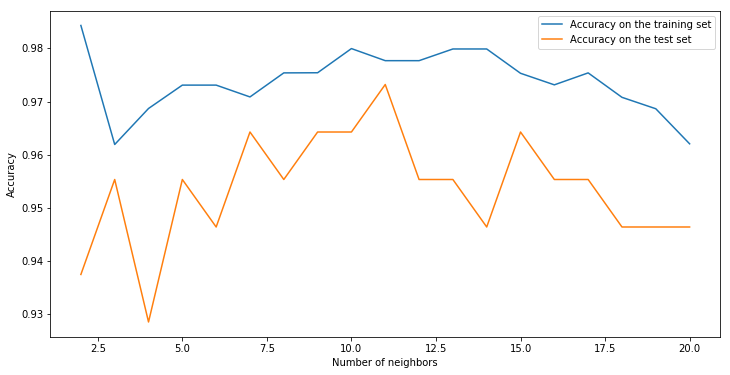

In [16]:
pyplot.figure(figsize=(12, 6))

pyplot.plot(param_grid['n_neighbors'], cross_valid_represent_train['mean_train_score'], 
            label='Accuracy on the training set')
pyplot.plot(param_grid['n_neighbors'], cross_valid_represent_test['mean_test_score'], 
            label='Accuracy on the test set')

pyplot.ylabel('Accuracy')
pyplot.xlabel('Number of neighbors')
pyplot.legend();

In [17]:
knn_clasifier = cross_valid.best_estimator_

from sklearn.metrics import accuracy_score
print("Accuracy of tuned knn classifier on test set: {:.3f}" \
      .format(accuracy_score(test_labels, knn_clasifier.predict(test_values))))

Accuracy of tuned knn classifier on test set: 0.974
